<a href="https://colab.research.google.com/github/Labibbib/MSA_Case_Study_1_Group-F/blob/main/CS_1_Group_F_Insight_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Sentimen komentar dan Tanggapan Publik di youtube terhadap diluncurkannya Danantara**

---

**Latar Belakang**

Peluncuran Badan Pengelola Investasi Daya Anagata Nusantara (Danantara) oleh Presiden Prabowo Subianto pada 24 Februari 2025 menjadi langkah strategis dalam mengoptimalkan investasi negara. Inisiatif ini dipandang sebagai bagian dari reformasi BUMN dan didorong untuk mempercepat pertumbuhan ekonomi Indonesia hingga 8% per tahun. Meski dianggap sebagai langkah strategis, kehadiran Danantara juga menimbulkan kontroversi, terutama terkait transparansi, potensi korupsi, serta keterbatasan audit oleh BPK dan KPK.

---

**Mengapa penting untuk di analisis?**

Program ini menuai kontroversi karena dianggap sebagai “ladang korupsi baru”, sehingga perlu dilakukan analisis bagaimana sebenarnya pendapat masyarakat.
Hasil analisis dapat memberikan rekomendasi kepada pemerintah untuk memperbaiki kebijakan dan meningkatkan kepercayaan masyarakat.

---

**Group F - Case Study 1**

| Nama | NIM | Kelas | Kontribusi |
| -------- | -------- | -------- | -------- |
| Ibnullabib   | 11220940000037   |  A  | Scraping, labeling, preprocessing, edit video, edit ppt, membuat video |
| Uswatun Hasanah | 11220940000053   |   B | Scraping, labeling, visualisasi, membuat ppt, membuat video |
| Muhammad Saeful Anwar | 11210940000061   |  B  | Scraping, labeling, preprocessing, visualisasi, membuat ppt |
| Dina Sekar Juliati | 11210940000020   |  A  | Scraping, labeling, insight mining, membuat video |

In [ ]:
!pip install bertopic

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
from collections import Counter
from wordcloud import WordCloud

# Load Data

In [ ]:
df = pd.read_excel('https://github.com/Labibbib/MSA_Case_Study_1_Group-F/raw/refs/heads/main/data_danantara/df_cleaned_danantara.xlsx')
df_brt = pd.read_excel('https://github.com/Labibbib/MSA_Case_Study_1_Group-F/raw/refs/heads/main/data_danantara/df_brt_danantara.xlsx')
df.sample(10)

,label,date,time,author,video_id,like_count,full_text,cleaned_text,judul_video,channel_yt,views_count
5501,2,19/02/2025,12:01:16,@suryarhaditiya,02_WTfYvQiE,0,Lebih menarik kalau pembahasan seperti di x ba...,tarik bahas erti enak,Memahami Danantara dengan Mudah,MALAKA,1950553
2621,0,23/02/2025,06:47:57,@galihviabela,02_WTfYvQiE,0,PAPA DANA *MENANGIS,menang,Memahami Danantara dengan Mudah,MALAKA,1950553
3677,2,20/02/2025,09:48:52,@HontouniYabai47,02_WTfYvQiE,0,24K+ 👍\n110 👎\nMenyala abangkuuuh 🔥🔥,abangkuuuh k nyala,Memahami Danantara dengan Mudah,MALAKA,1950553
8484,1,23/03/2025,14:14:35,@brindanda1721,LTrJJ4X3D5Q,0,Cek bangkunya empukin lah kaya bangku lu om sa...,bangku sandi empukin bangku kaya cek,Bahas Investasi & Danantara Bareng Sandiaga Uno,Timothy Ronald,937500
3095,2,21/02/2025,09:58:51,@nanarudiana4163,02_WTfYvQiE,0,Saya ga khawatir karena ga punya tabungan di b...,tabung khawatir hidup hari sulit bank,Memahami Danantara dengan Mudah,MALAKA,1950553
7094,1,24/02/2025,07:44:36,@sidikhamzah3720,PNFTdgS0Mgc,0,"mantap salut untuk Presiden Prabowo ,selamat b...",selamat republik tokoh kompak mantap prabowo t...,LIVE: Presiden RI Luncurkan Daya Anagata Nusan...,Sekretariat Presiden Indonesia,176458
3497,0,20/02/2025,14:51:43,@BuanaLaut,02_WTfYvQiE,0,Mau percaya kalo program nya bakal berjalan la...,das curi jalan lancar tikus percaya,Memahami Danantara dengan Mudah,MALAKA,1950553
3215,0,21/02/2025,04:36:39,@satriair04,02_WTfYvQiE,0,Danantara dalam kulit kacang :\n\n1. Investasi...,meme kripto rugpull hasil tipu terima ala kuli...,Memahami Danantara dengan Mudah,MALAKA,1950553
2705,0,22/02/2025,17:18:03,@Kecil.Pintar,02_WTfYvQiE,0,🫠 masalahnya yang pegang nih bisa di percaya a...,percaya,Memahami Danantara dengan Mudah,MALAKA,1950553
9320,2,15/02/2025,10:00:20,@MuhammadNasib-w6u,ruqEjXiJZGw,0,Sebagian besar yang komentar adalah orang oran...,tikus komentar maling bebas ancam bijak,Jalur Cepat RUU BUMN dan Manuver Menguasai Dan...,Tempodotco,824926


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9423 entries, 0 to 9422
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   label         9423 non-null   int64 
 1   date          9423 non-null   object
 2   time          9423 non-null   object
 3   author        9423 non-null   object
 4   video_id      9423 non-null   object
 5   like_count    9423 non-null   int64 
 6   full_text     9423 non-null   object
 7   cleaned_text  9277 non-null   object
 8   judul_video   9423 non-null   object
 9   channel_yt    9423 non-null   object
 10  views_count   9423 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 809.9+ KB


In [ ]:
df['date'] = pd.to_datetime(df['date'])

# Insight Mining

In [ ]:
df_WC = df[['label','cleaned_text']]
WC_positive = df_WC[df_WC['label'] == 1]
WC_negative = df_WC[df_WC['label'] == 0]

## Word cloud gabungan

In [ ]:
all_text_gab = ' '.join(word for word in df_WC['cleaned_text'].astype(str))

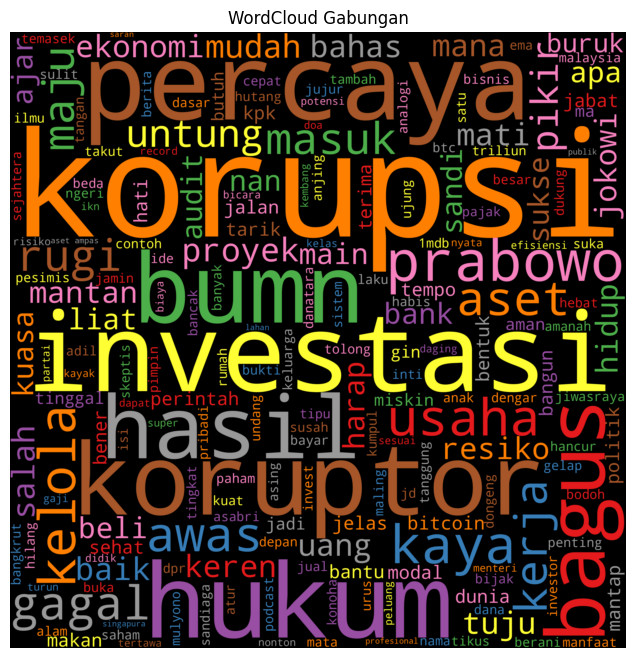

In [ ]:
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='black',
    max_font_size=300,       # Set ukuran font maksimum yang lebih besar
    relative_scaling=0.5,    # Set scaling relatif untuk membuat kata-kata lebih rapat
    scale=3,                 # Set skala untuk meningkatkan resolusi
    # max_words=10             # Set limitasi kata
).generate(all_text_gab)

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Gabungan')
plt.margins(x=0, y=0)
plt.show()

## Word cloud positif

In [ ]:
# Buat WordCloud dengan parameter yang telah disesuaikan
all_text_pos = ' '.join(word for word in WC_positive['cleaned_text'].astype(str))

# Tokenisasi teks
words_pos = all_text_pos.split()

# Hitung frekuensi kata
word_counts_pos = Counter(words_pos)

# Dapatkan 20 kata terbanyak
top_50_words_pos = word_counts_pos.most_common(50)

# Konversi daftar tuple (kata, frekuensi) menjadi dictionary
word_freq_pos = dict(top_50_words_pos)

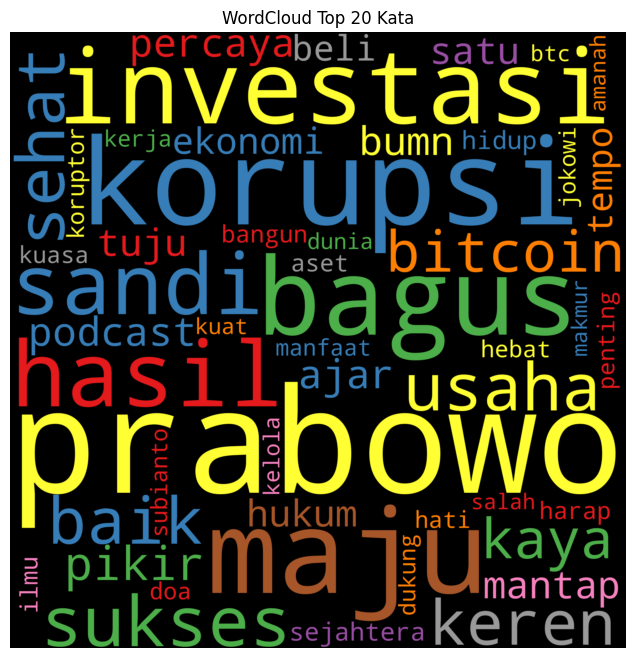

In [ ]:
# Buat objek WordCloud dengan parameter yang diinginkan
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='black',
    max_font_size=300,
    relative_scaling=0.5,
    scale=3,
    # Perhatikan, kita tidak lagi membatasi max_words di sini
    # karena kita sudah memberikan 20 kata terbanyak
).generate_from_frequencies(word_freq_pos) # Menggunakan generate_from_frequencies

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Top 20 Kata')
plt.margins(x=0, y=0)
plt.show()

## Word cloud negatif

In [ ]:
# Buat WordCloud dengan parameter yang telah disesuaikan
all_text_neg = ' '.join(word for word in WC_negative['cleaned_text'].astype(str))

# Tokenisasi teks
words_neg = all_text_neg.split()

# Hitung frekuensi kata
word_counts_neg = Counter(words_neg)

# Dapatkan 20 kata terbanyak
top_50_words_neg = word_counts_neg.most_common(50)

# Konversi daftar tuple (kata, frekuensi) menjadi dictionary
word_freq_neg = dict(top_50_words_neg)

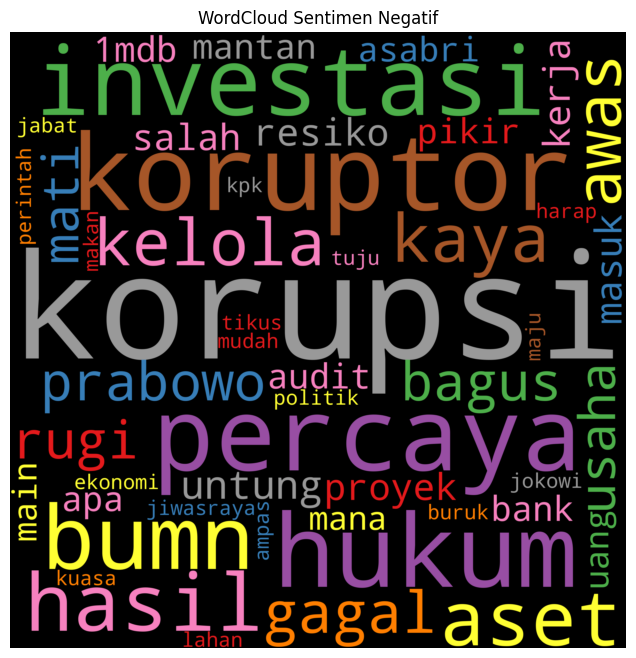

In [ ]:
# Buat WordCloud dengan parameter yang telah disesuaikan
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='black',
    max_font_size=300,       # Set ukuran font maksimum yang lebih besar
    relative_scaling=0.5,    # Set scaling relatif untuk membuat kata-kata lebih rapat
    scale=3,                 # Set skala untuk meningkatkan resolusi
    # max_words=10             # Set limitasi kata
).generate_from_frequencies(word_freq_neg)

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Negatif')
plt.margins(x=0, y=0)
plt.show()

Berdasarkan WordCloud gabungan, terlihat bahwa topik yang paling sering muncul dalam percakapan mencerminkan perhatian publik terhadap isu kepercayaan, korupsi, investasi, dan peran BUMN. Kata-kata seperti "percaya", "korupsi", "investasi", "hukum", dan "BUMN" mendominasi, yang menunjukkan bahwa masyarakat sangat fokus pada integritas pemerintah, stabilitas hukum, dan peluang ekonomi. Terdapat campuran sentimen dalam percakapan, dengan kata-kata positif seperti "bagus", "usaha", dan "hasil" yang mencerminkan harapan, serta kata-kata negatif seperti "koruptor", "gagal", dan "buruk" yang mengindikasikan kekhawatiran terhadap kondisi saat ini. Ini menunjukkan adanya harapan masyarakat terhadap perbaikan ekonomi dan pemerintahan yang bersih, namun juga terselip kecemasan terhadap masalah korupsi dan kegagalan sistem.

# WordLink

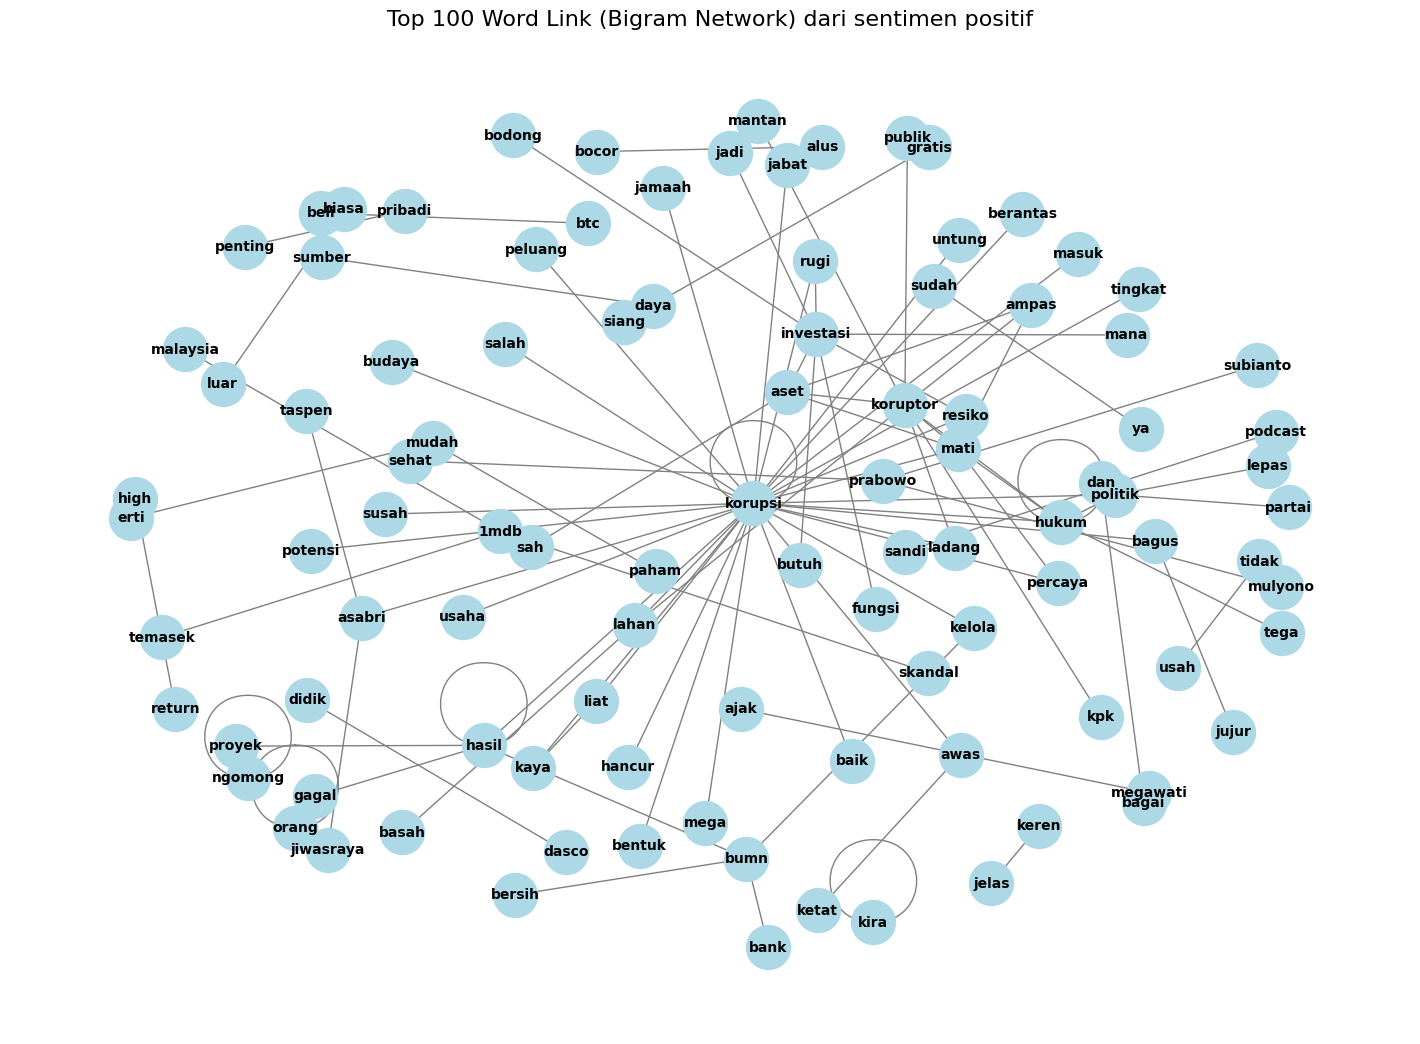

In [ ]:
# Ambil teks komentar dengan label i
komen = df['cleaned_text'].astype(str).tolist()

# Gunakan CountVectorizer untuk bigram
vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=2)
X = vectorizer.fit_transform(komen)
bigrams = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

# Gabungkan bigram dan frekuensinya
bigram_freq = list(zip(bigrams, counts))
bigram_freq_sorted = sorted(bigram_freq, key=lambda x: x[1], reverse=True)

# Ambil 50 bigram teratas (ubah jumlah sesuai kebutuhan)
top_n = 100
top_bigrams = [b[0] for b in bigram_freq_sorted[:top_n]]
edges = [tuple(b.split()) for b in top_bigrams]

# Buat graph dari bigram
G3 = nx.Graph()
G3.add_edges_from(edges)

# Visualisasi
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G3, k=0.6, seed=42)
nx.draw(
    G3, pos,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    node_size=1000,
    font_size=10,
    font_weight='bold'
)
plt.title(f"Top {top_n} Word Link (Bigram Network) dari sentimen positif", fontsize=16)
plt.show()

**Kritik terhadap tokoh dan politik**
- Munculnya nama-nama seperti:

    - prabowo, sandiaga, jokowiburuk, dasco, sby

- Terkait dengan kata-kata seperti korupsi, aset, kaya, gratis, bocor, berkat

- Ini menunjukkan bahwa banyak komentar negatif yang mengaitkan Danantara dengan isu politik dan dugaan ketidakterbukaan atau korupsi.

**Isu ekonomi dan investasi**

- Terlihat kata-kata seperti investasi, crypto, bitcoin, bodong, bangkrut, aset, usaha, sales

- Komentar negatif tampaknya skeptis terhadap keamanan investasi di Danantara — ada kecurigaan bahwa ini bisa seperti skema investasi bodong.

**Kritik terhadap lembaga atau institusi**
- Munculnya kata seperti bumn, audit, ketat, hukum, demo, pimpinan, etik

- Menunjukkan kekhawatiran masyarakat tentang pengawasan, transparansi, dan etika penyelenggaraan proyek Danantara.

**Sentimen sinis dan sarkastik**
- Kata seperti jokowiburuk, gelap, ujung, bocor, korupsi, bohong, bangga (mungkin digunakan secara sarkastik)

- Ini menunjukkan bahwa ada sebagian netizen yang tidak percaya terhadap narasi positif pemerintah.

**Isu sosial & personal**
- Terdapat istilah seperti mahasiswa, hidup, sejahtera, taspen, dengar, demo, tokoh

- Bisa diartikan bahwa kalangan masyarakat sipil, terutama mahasiswa atau aktivis, menyuarakan kritik terhadap implikasi sosial dari proyek ini.

**Insight utama:**
Visualisasi ini memperkuat bahwa sentimen negatif terhadap Danantara tidak hanya bersifat emosional, tapi juga substantif—melibatkan kritik terhadap:

- aktor politik dan elit,

- integritas program (korupsi, aset, investasi bodong), dan

- kekhawatiran masyarakat akan dampaknya terhadap ekonomi dan sosial.

# Tren Percakapan Per Bulan

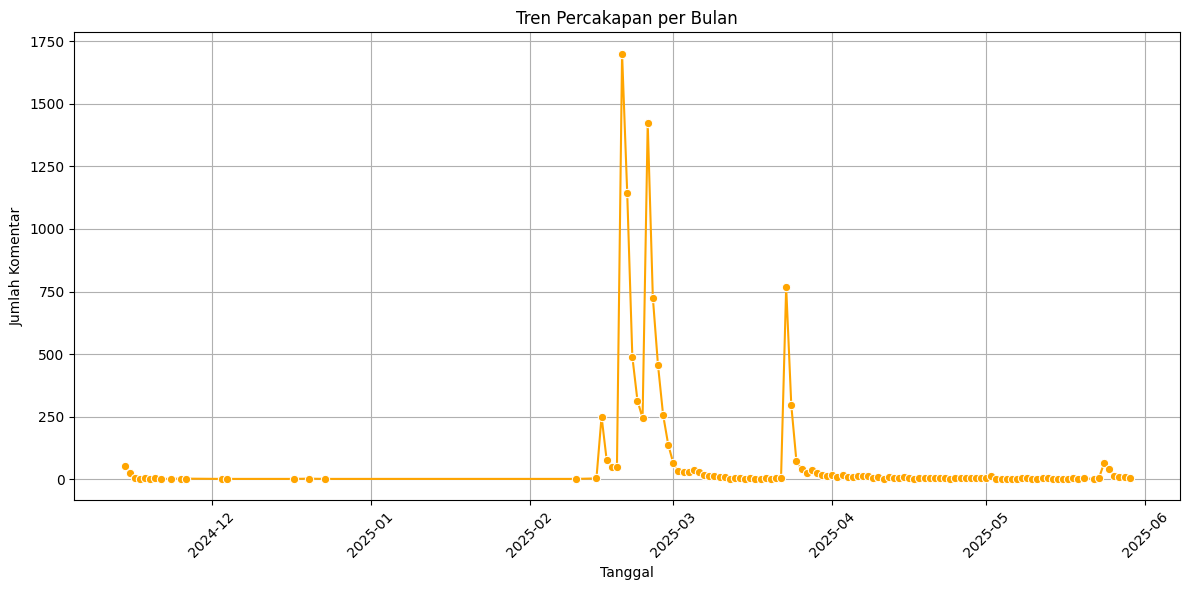

In [ ]:
# Konversi kolom 'date' ke format datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# hitung jumlah komentar per hari
daily_trend = df.groupby(df['date'].dt.date).size().reset_index(name='jumlah_komentar')

# 4. Visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_trend, x='date', y='jumlah_komentar', marker='o', color='orange')
plt.title('Tren Percakapan per Bulan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Komentar')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan grafik terlihat adanya lonjakan signifikan dalam jumlah komentar pada pertengahan hingga akhir Februari 2025. Lonjakan ini menunjukkan bahwa terdapat peristiwa atau isu penting yang menjadi perhatian publik pada periode tersebut, dengan puncak interaksi mencapai hampir 1750 komentar dalam satu hari. Setelah periode tersebut, tren percakapan menurun tajam dan kembali stabil dengan jumlah komentar yang jauh lebih rendah, meskipun sempat terjadi sedikit peningkatan kembali pada akhir Maret dan akhir Mei 2025. Hal ini mengindikasikan bahwa percakapan publik cenderung dipicu oleh isu tertentu yang bersifat sementara. Ini menunjukkan pentingnya menganalisis konteks waktu dan peristiwa pemicu dalam memahami pola percakapan masyarakat.

Lonjakan perhatian pada pertengahan hingga akhir Februari 2025 berasal dari dua video utama. Video MALAKA berjudul "Memahami Danantara dengan Mudah" mendapatkan banyak komentar positif karena mampu menjelaskan Danantara dengan cara yang sederhana dan mudah dipahami. Penonton merasa terbantu serta mengekspresikan rasa paham dan apresiasi terhadap penjelasan yang mencerahkan tersebut. Sementara itu, video dari Sekretariat Presiden berjudul "LIVE: Presiden RI Luncurkan Daya Anagata Nusantara (Danantara), 24 Februari 2025" memicu respons beragam, mulai dari dukungan optimis hingga kekhawatiran kritis. Komentar-komentar ini dipicu oleh kepedulian terhadap kebijakan publik dan harapan agar program tersebut dapat dijalankan secara transparan dan berkelanjutan.

Kemudian, pada akhir Maret 2025 terjadi lonjakan signifikan yang berasal dari video Timothy Ronald berjudul "Bahas Investasi & Danantara Bareng Sandiaga Uno". Video ini membawa narasi Danantara ke ranah yang lebih praktis dan ekonomis, khususnya mengenai peluang investasi. Sebagian besar penonton di kolom komentar menunjukkan ketertarikan dan antusiasme terhadap potensi yang ditawarkan Danantara, terutama dalam konteks ekonomi digital dan masa depan anak muda. Keterlibatan tokoh seperti Sandiaga Uno, yang dikenal dekat dengan isu kewirausahaan, menambah optimisme dan rasa ingin tahu di kalangan penonton.


# Distribusi Sentiment Postingan

In [ ]:
# Mapping label
label_map = {0: 'Negatif', 1: 'Positif', 2: 'Netral'}
df['label_str'] = df['label'].map(label_map)

In [ ]:
df['label_str'].value_counts().sort_index()

,count
label_str,
Negatif,5454
Netral,2527
Positif,1442


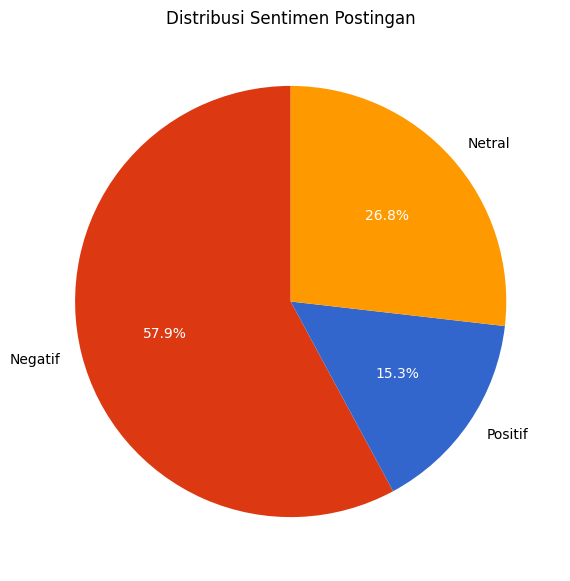

In [ ]:
# Definisikan arti label
label_map = {0: 'Negatif', 1: 'Positif', 2: 'Netral'}

# Hitung jumlah dan persen tiap label
label_counts = df['label'].value_counts().sort_index()

# Pie chart
plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(label_counts,
                                   labels=[label_map[i] for i in label_counts.index],
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   colors=['#dc3912','#3366cc','#ff9900'])

# Atur warna: label (hitam), persentase (putih)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('white')

plt.title('Distribusi Sentimen Postingan')
plt.show()


Berdasarkan diagram mayoritas percakapan di media sosial didominasi oleh sentimen negatif (57,9%), diikuti oleh netral (26,8%), dan hanya sebagian kecil yang positif (15,3%). Dominasi sentimen negatif ini mencerminkan adanya ketidakpuasan, kekhawatiran, atau kritik publik terhadap isu-isu yang sedang dibicarakan, kemungkinan besar berkaitan dengan tema-tema seperti korupsi, ketidakadilan, atau kinerja pemerintah seperti yang juga terlihat pada WordCloud sebelumnya. Sementara itu, porsi sentimen netral menunjukkan bahwa sebagian percakapan bersifat informatif atau deskriptif tanpa muatan emosional tertentu. Rendahnya porsi sentimen positif mengindikasikan bahwa narasi optimis atau dukungan terhadap isu yang dibahas masih sangat terbatas. Hal ini penting sebagai sinyal bahwa perlu ada strategi komunikasi publik yang lebih baik untuk membangun kepercayaan dan persepsi positif di tengah masyarakat.

# Top 10 author dengan total like terbanyak

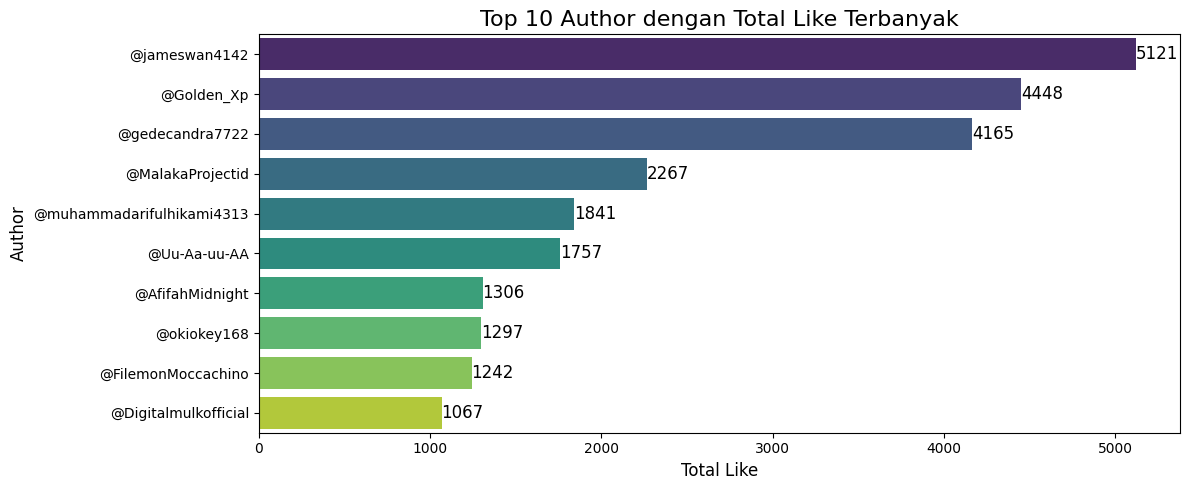

In [ ]:
# Hitung total like per author
likes_per_author = df.groupby('author')['like_count'].sum()
top10_authors = likes_per_author.sort_values(ascending=False).head(10)

# Buat palet warna gradasi (misalnya viridis)
colors = sns.color_palette("viridis", len(top10_authors))  # Bisa ganti ke plasma, rocket, etc.

plt.figure(figsize=(12, 5))
ax = sns.barplot(
    x=top10_authors.values,
    y=top10_authors.index,
    palette=colors,
    orient='h'
)

# Tambahkan nilai di ujung bar
for i, val in enumerate(top10_authors.values):
    ax.text(val + 0.1, i, str(val), va='center', fontsize=12, color='black')

plt.title('Top 10 Author dengan Total Like Terbanyak', fontsize=16)
plt.xlabel('Total Like', fontsize=12)
plt.ylabel('Author', fontsize=12)
plt.tight_layout()
plt.show()

Pengguna dengan nama akun @jameswan4142 menempati posisi teratas dengan 5121 like, disusul oleh @Golden_Xp (4448) dan @gedecandra7722 (4165). Dominasi akun-akun ini menunjukkan bahwa komentar mereka mendapat perhatian dan berpengaruh cukup besar dalam percakapan terkait video tersebut. Oleh karena itu,  penting untuk mengevaluasi apakah isi komentar mereka berdampak positif atau negatif terhadap opini publik.
- Komentar dari jameswan4142 (video id 02_WTfYvQiE)
 "Satu hal yang lupa lu ceritain. Pertiwi nambah jumlah pembantunya dari 34 menjadi 53, serta nambah supirnya dari 18 ke 56. Dan itu pertiwi lakukan disaat ia ingin berhemat." komentar ini berupa sindiran yang menunjukkan ketidaksesuaian antara klaim hemat dengan penambahan tenaga kerja, mengkritik kebijakan secara negatif.
- Komentar dari @Golden_Xp (video ID 02_WTfYvQiE)
 "Segmen bagus ini bang. Itung2 merubah stigma bertanya = bodoh. Jangan malu jadi bodoh, malulah kalau tidak mau lepas dari kebodohan." Ini Komentar positif yang mengajak menghilangkan stigma takut bertanya, menekankan pentingnya bertanya sebagai proses belajar.
- Komentar dari @gedecandra7722 (video ID 02_WTfYvQiE)
  "Berdasarkan historis pengelolaan dana seperti ASABRI, Jamsostek, Taspen yang terbukti korup. Risikonya lebih tinggi ditilep pejabat Indonesia yang terbiasa korupsi secara sistemik."
 Komentar ini bersifat kritis dan menunjukkan tingkat ketidakpercayaan tinggi terhadap institusi negara. Meski bernada negatif, banyak disukai karena dianggap mewakili kekhawatiran publik.

In [ ]:
# Hitung total like per author
likes_per_author = df.groupby('author')['like_count'].sum()

# Ambil top 10 author berdasarkan total like
top10_authors = likes_per_author.sort_values(ascending=False).head(10)

# Filter data hanya untuk top 10 author
top10auth_df = df[df['author'].isin(top10_authors.index)]

# Ambil label dominan untuk masing-masing author
dominant_label = top10auth_df.groupby('author')['label'].agg(lambda x: x.value_counts().idxmax())

# Gabungkan total like dan label
result = pd.DataFrame({
    'Total Like': top10_authors,
    'Label Sentimen': dominant_label.map({0: 'Negatif', 1: 'Positif', 2: 'Netral'})
})

# Urutkan berdasarkan Total Like
result = result.sort_values(by='Total Like', ascending=False).reset_index().rename(columns={'author': 'Author'})

# Tampilkan
print(result)

                      Author  Total Like Label Sentimen
0              @jameswan4142        5121         Netral
1                 @Golden_Xp        4448         Netral
2            @gedecandra7722        4165        Negatif
3           @MalakaProjectid        2267         Netral
4  @muhammadarifulhikami4313        1841        Negatif
5               @Uu-Aa-uu-AA        1757        Negatif
6            @AfifahMidnight        1306        Negatif
7                @okiokey168        1297        Negatif
8         @FilemonMoccachino        1242        Positif
9       @Digitalmulkofficial        1067         Netral


# Distribusi sentiment pada video youtube

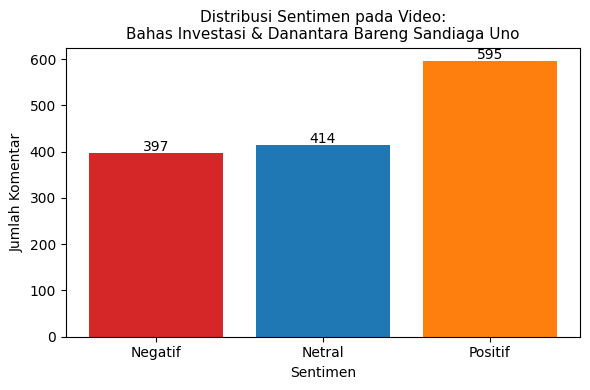

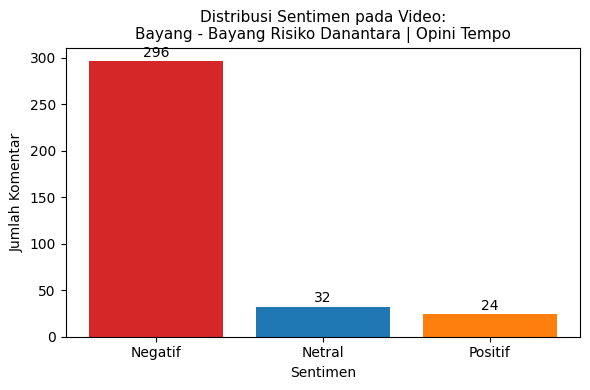

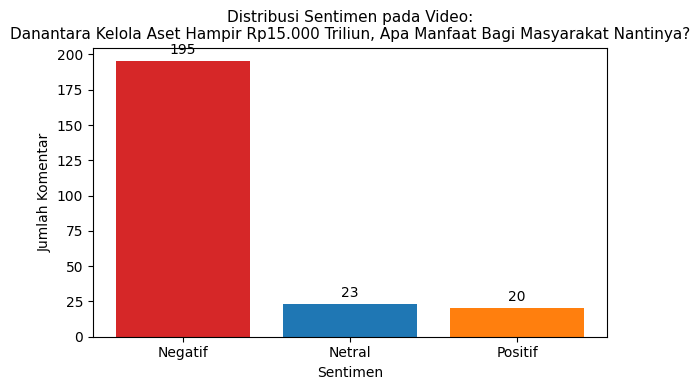

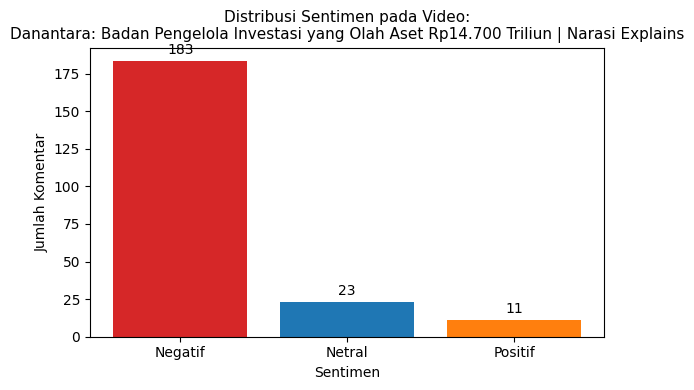

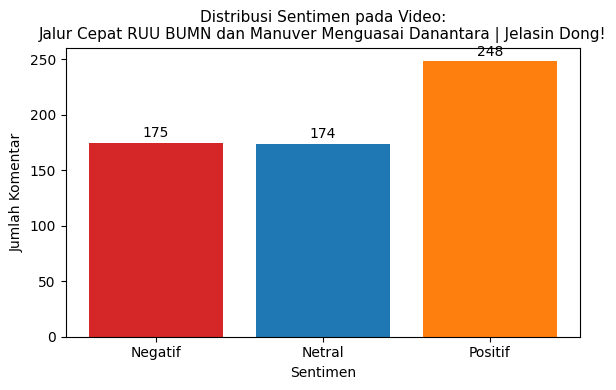

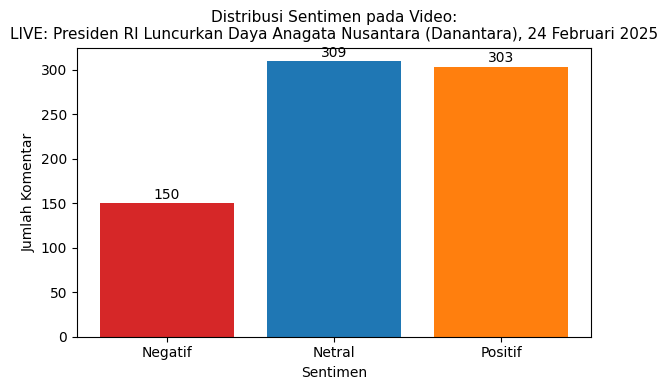

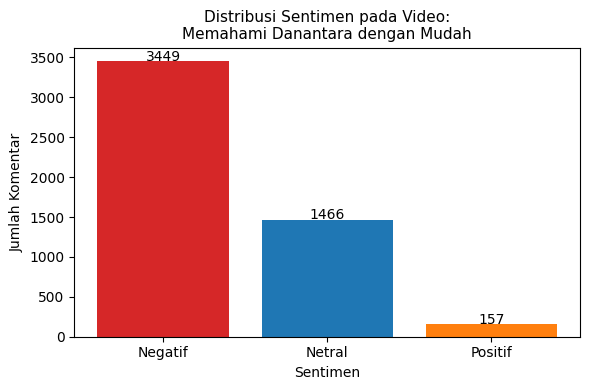

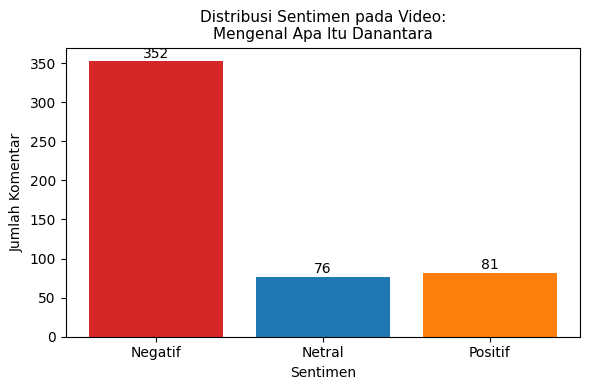

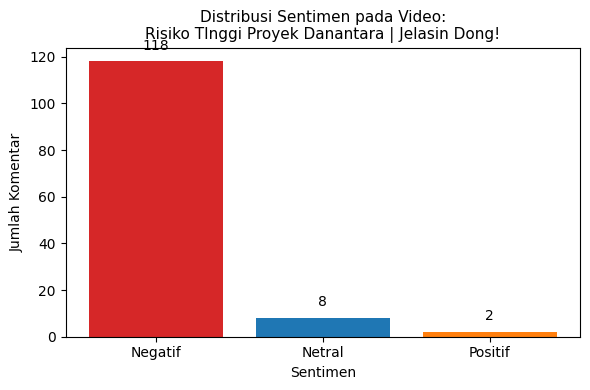

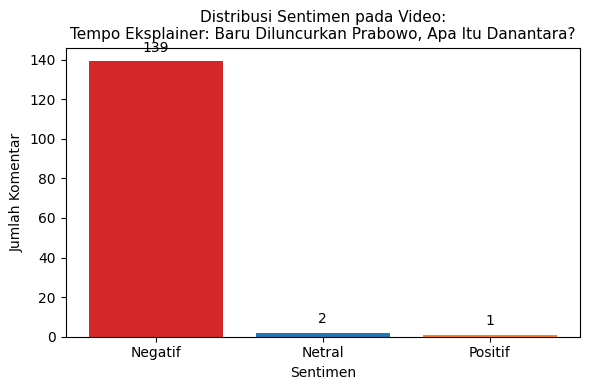

In [ ]:
# Hitung jumlah komentar per sentimen untuk setiap video
sentiment_per_video = df.groupby(['judul_video', 'label_str']).size().unstack(fill_value=0)

# Visualisasi: Bar chart terpisah per video
for idx, row in sentiment_per_video.iterrows():
    plt.figure(figsize=(6,4))
    bars = plt.bar(row.index, row.values, color=['#d62728', '#1f77b4', '#ff7f0e'])  # warna: Negatif, Positif, Netral
    plt.title(f"Distribusi Sentimen pada Video:\n{idx}", fontsize=11)
    plt.ylabel("Jumlah Komentar")
    plt.xlabel("Sentimen")

    # Tambahkan label pada masing-masing bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                 f'{int(height)}', ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

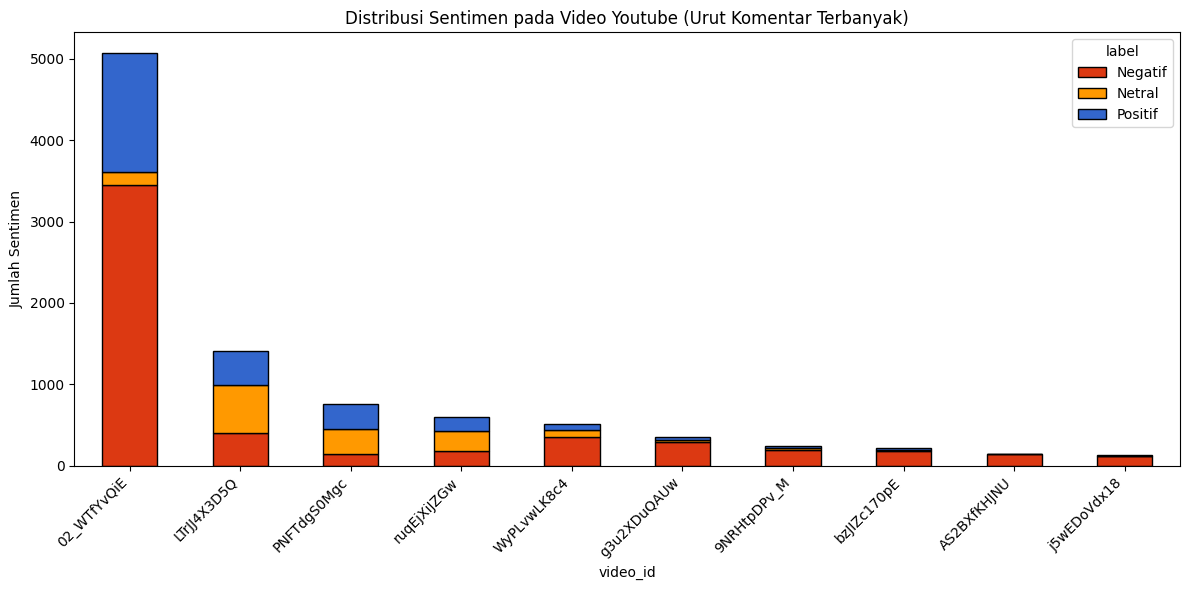

In [ ]:
# Hitung jumlah sentimen per video
video_sentiment = df.groupby(['video_id', 'label']).size().unstack(fill_value=0)

# Mapping label numerik ke teks
sentiment_mapping = {0: 'Negatif', 1: 'Netral', 2: 'Positif'}
video_sentiment = video_sentiment.rename(columns=sentiment_mapping)

# Pastikan urutan kolom konsisten
ordered_columns = ['Negatif', 'Netral', 'Positif']
video_sentiment = video_sentiment[ordered_columns]

# Tambahkan kolom total komentar untuk pengurutan
video_sentiment['Total'] = video_sentiment.sum(axis=1)

# Urutkan berdasarkan total komentar
video_sentiment = video_sentiment.sort_values(by='Total', ascending=False)

# Hapus kolom 'Total' setelah pengurutan jika tidak ingin ditampilkan
video_sentiment = video_sentiment.drop(columns='Total')

# Plot stacked bar chart
video_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6),
                     color=['#dc3912', '#ff9900', '#3366cc'], edgecolor='black')

plt.title('Distribusi Sentimen pada Video Youtube (Urut Komentar Terbanyak)')
plt.xlabel('video_id')
plt.ylabel('Jumlah Sentimen')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Grafik ini menunjukkan distribusi sentimen dari berbagai video YouTube yang dianalisis. Video dengan ID "02_WTfYvQiE" yang berjudul "***Memahami Danantara dengan Mudah***" (https://www.youtube.com/watch?v=02_WTfYvQiE) channel **Malaka** memiliki jumlah sentimen tertinggi dibandingkan video lainnya, dan sebagian besar sentimen yang muncul terhadap video ini bersifat negatif. Hal ini mengindikasikan bahwa video tersebut kemungkinan besar menampilkan atau membahas konten yang memicu kontroversi, ketidakpuasan, atau kekhawatiran dari penonton. Beberapa video lain juga menampilkan pola serupa, meskipun dalam skala yang lebih kecil. Fenomena ini menunjukkan bahwa persepsi terhadap konten YouTube dalam topik ini lebih cenderung ke arah kritik dibandingkan apresiasi.



# Distribusi komentar dan like pada video youtube

<Figure size 1400x600 with 0 Axes>

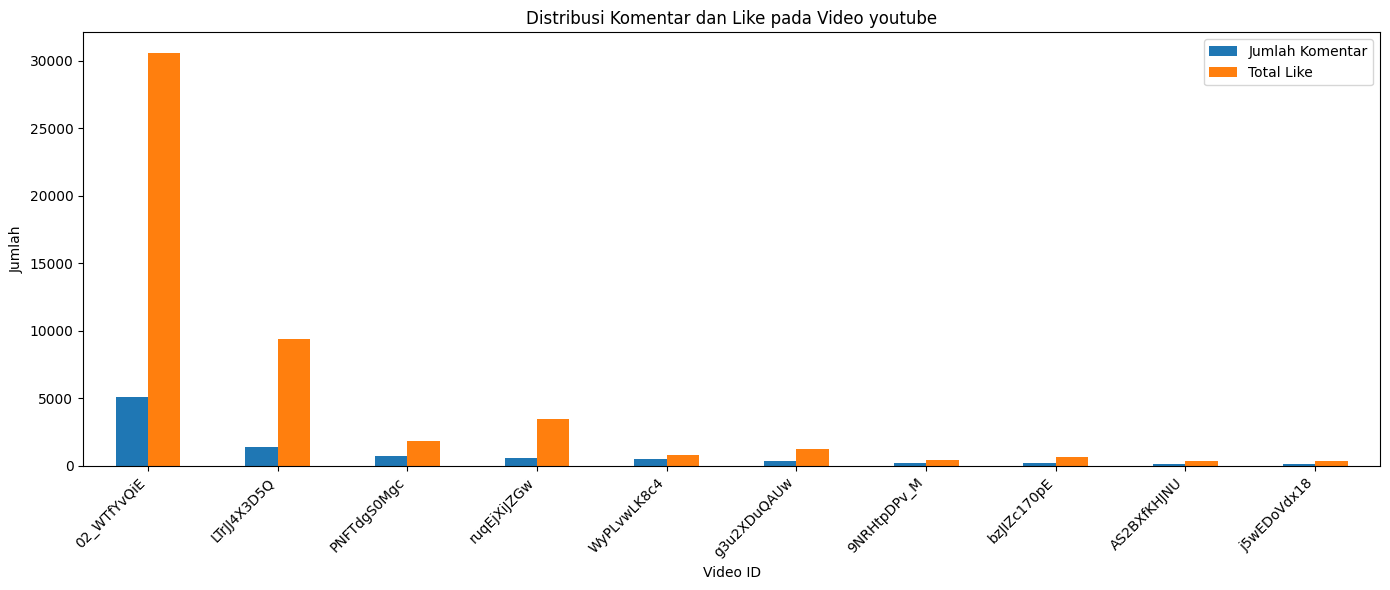

In [ ]:
# Hitung jumlah komentar per video (berapa kali video_id muncul)
comment_count = df['video_id'].value_counts()

# Hitung total like per video
like_count = df.groupby('video_id')['like_count'].sum()

# Gabungkan keduanya jadi satu DataFrame
video_stats = pd.DataFrame({
    'Jumlah Komentar': comment_count,
    'Total Like': like_count
})

# Urutkan berdasarkan jumlah komentar (atau bisa total like)
video_stats = video_stats.sort_values('Jumlah Komentar', ascending=False)

# Plot
plt.figure(figsize=(14, 6))
video_stats[['Jumlah Komentar', 'Total Like']].plot(kind='bar', figsize=(14,6))
plt.title('Distribusi Komentar dan Like pada Video youtube')
plt.xlabel('Video ID')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


Dari grafik yang membandingkan jumlah komentar dan like per video, terlihat bahwa video dengan ID "02_WTfYvQiE" yang berjudul "***Memahami Danantara dengan Mudah***" dari channel **Malaka** (https://www.youtube.com/watch?v=02_WTfYvQiE) kembali menonjol dengan jumlah like dan komentar tertinggi. Hal ini menunjukkan bahwa video tersebut tidak hanya menarik perhatian banyak orang, tetapi juga mendorong tingkat keterlibatan yang tinggi dari audiens. Namun, mengingat hasil distribusi sentimen sebelumnya yang menunjukkan dominasi sentimen negatif, tingginya komentar kemungkinan besar berisi kritik atau perdebatan. Ini mencerminkan bahwa viralitas tidak selalu diiringi oleh sentimen positif, sehingga penting bagi kreator dan analis konten untuk memperhatikan kualitas respon, bukan hanya kuantitas interaksi.



# Tren percakapan per bulan berdasarkan sentiment

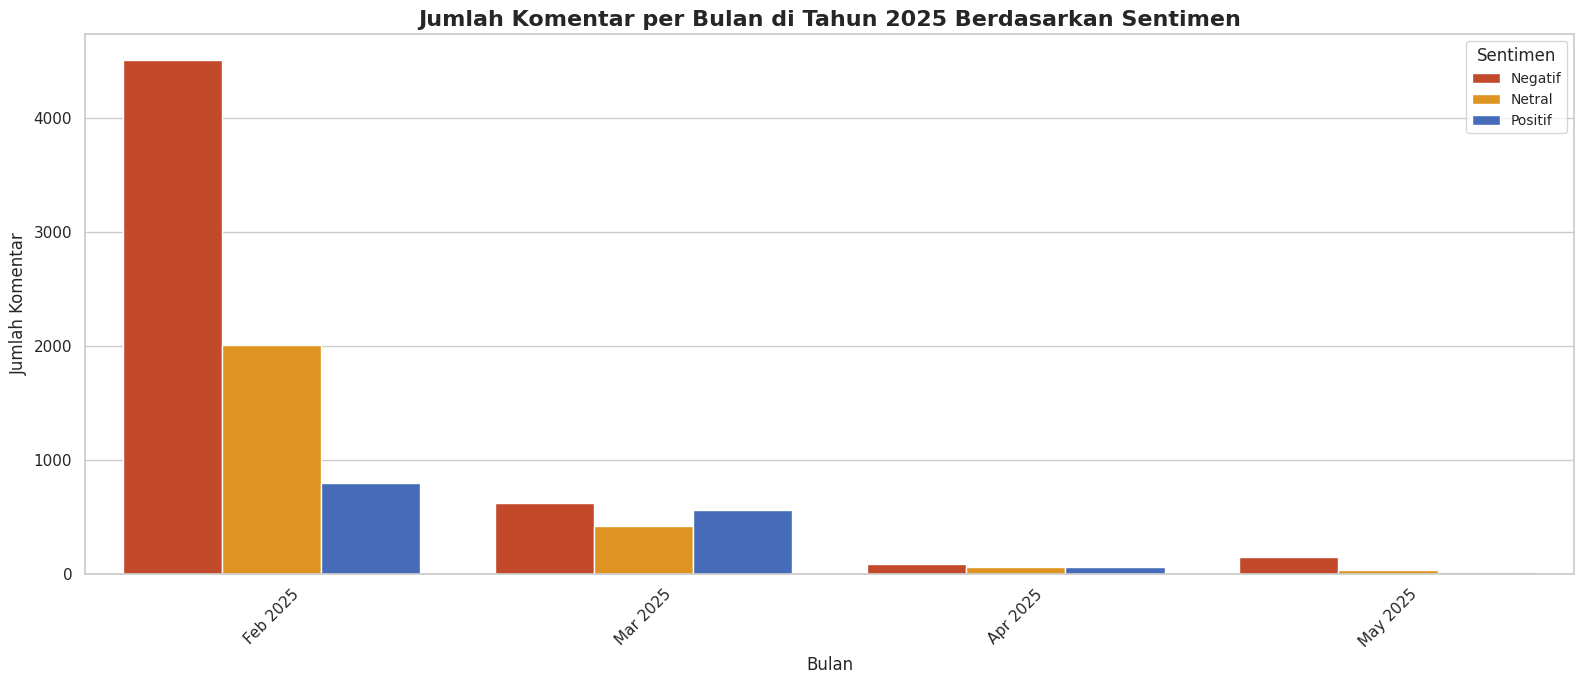

In [ ]:
# Pastikan format datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Tambahkan kolom tahun dan bulan
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.strftime('%Y-%m')

# Filter hanya tahun 2025
df_2025 = df[df['year'] == 2025]

# Map label ke sentimen
sentiment_map = {0: 'Negatif', 1: 'Positif', 2: 'Netral'}
df_2025['sentiment'] = df_2025['label'].map(sentiment_map)

# Hitung jumlah komentar per bulan dan sentimen
monthly_counts = df_2025.groupby(['month', 'sentiment']).size().reset_index(name='jumlah')

# Urutkan berdasarkan bulan
monthly_counts['month'] = pd.to_datetime(monthly_counts['month'])
monthly_counts = monthly_counts.sort_values('month')
monthly_counts['month_str'] = monthly_counts['month'].dt.strftime('%b %Y')

# Set style
sns.set(style='whitegrid')

# Plot barplot
plt.figure(figsize=(16, 7))
sns.barplot(data=monthly_counts, x='month_str', y='jumlah', hue='sentiment', palette={
    'Negatif': '#dc3912',
    'Netral': '#ff9900',
    'Positif': '#3366cc'
})

# Judul dan label
plt.title('Jumlah Komentar per Bulan di Tahun 2025 Berdasarkan Sentimen', fontsize=16, weight='bold')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Komentar', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sentimen', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()

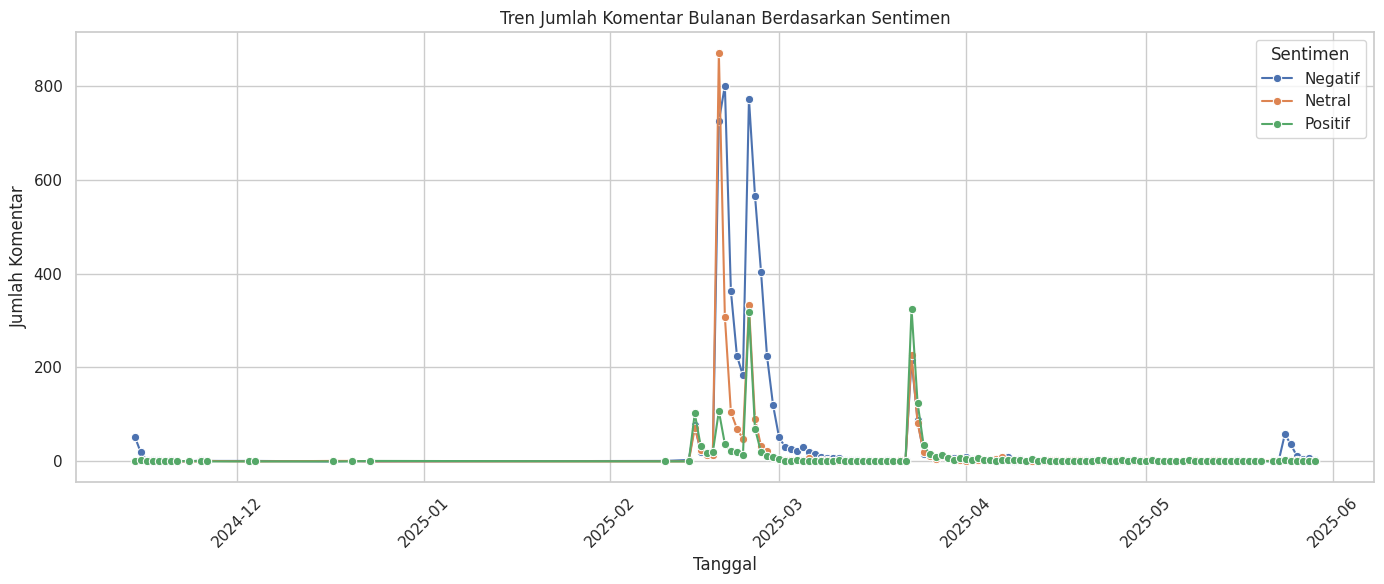

In [ ]:
# Konversi kolom 'date' ke format datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Buat kategori sentimen
sentiment_map = {0: 'Negatif', 1: 'Positif', 2: 'Netral'}
df['sentiment'] = df['label'].map(sentiment_map)

# hitung jumlah komentar per sentimen per hari
sentiment_trend = df.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

# Visualisasi Tren Harian Berdasarkan Sentimen
plt.figure(figsize=(14, 6))

# Plot garis untuk setiap sentimen
for sentiment_category in sentiment_trend.columns:
     sns.lineplot(data=sentiment_trend, x=sentiment_trend.index, y=sentiment_category, marker='o', label=sentiment_category)

# Mengatur tampilan grafik
plt.title('Tren Jumlah Komentar Bulanan Berdasarkan Sentimen')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Komentar')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Sentimen')
plt.show()

Grafik menunjukkan adanya lonjakan signifikan pada sentimen negatif di hari tertentu, sementara hari-hari lainnya relatif stabil dengan jumlah sentimen yang lebih rendah. Lonjakan ini dapat mengindikasikan bahwa terdapat peristiwa penting yang memicu percakapan besar, seperti rilis video baru, kontroversi tokoh publik, atau berita viral. Ini penting dalam konteks monitoring media sosial secara real-time, karena dapat digunakan untuk mendeteksi momen krisis, peluang kampanye, atau perubahan persepsi publik yang cepat. Dengan analisis lanjutan terhadap konten pada hari-hari lonjakan, dapat ditemukan penyebab utama dan strategi penanganan yang tepat.

# BERTopic

In [ ]:
komen = df_brt['clean_text'].astype(str).tolist()

In [ ]:
# Inisialisasi & fit model
topic_model = BERTopic(language="indonesian", calculate_probabilities=True)  # gunakan bahasa Indonesia
topics, probs = topic_model.fit_transform(komen)

In [ ]:
# Lihat daftar topik dominan
dom_topic =  topic_model.get_topic_info()
dom_topic.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3923,-1_yg_danantara_dana_negara,"[yg, danantara, dana, negara, korupsi, bumn, k...",[menyediakan pendidikan penyediaan lapangan pe...
1,0,320,0_ibu_pertiwi_anak_anaknya,"[ibu, pertiwi, anak, anaknya, papa, dana, suam...",[punya cerita suami ibu pertiwi meninggal meni...
2,1,258,1_pemerintah_program_kebijakan_politik,"[pemerintah, program, kebijakan, politik, raky...",[danantara kurang lebih kaya program tata kelo...
3,2,208,2_investasi_bodong_invest_saham,"[investasi, bodong, invest, saham, investor, m...","[investasi bodong gak nih, investasi bodong pe..."
4,3,206,3_bang_bahas_eget_pulang,"[bang, bahas, eget, pulang, nikah, nec, sm, jd...",[maju kena mundur kena bang klo papa dana laki...
5,4,189,4_presiden_prabowo_mantan_pak,"[presiden, prabowo, mantan, pak, wakil, bapak,...","[sehat selalu pak presiden, terharu pengen net..."
6,5,159,5_indonesia_maju_jaya_semoga,"[indonesia, maju, jaya, semoga, emas, seluruh,...","[indonesia, indonesia, indonesia]"
7,6,132,6_indonesia_korupsi_koruptor_dtower,"[indonesia, korupsi, koruptor, dtower, ruh, hu...",[stigma banyak orang indonesia suka ngambil bu...
8,7,119,7_korupsi_masalah_ujung_korup,"[korupsi, masalah, ujung, korup, berjamaah, ko...","[korupsi, korupsi, korupsi]"
9,8,116,8_terimakasih_terima_thanks_makasih,"[terimakasih, terima, thanks, makasih, kasih, ...","[terima kasih penjelasannya, terima kasih penj..."


In [ ]:
# Visualisasi
topic_model.visualize_topics()

dom_topic['Representation'].iloc[1]
dom_topic['Representative_Docs'].iloc[2]


1. Ada perbincangan mengenai Danantara yang dikhawatirkan seperti skandal investasi yang gagal dan akhirnya dikorupsi, seperti 1MDB dari Malaysia.
2. Ada juga yang mengharapkan Danantara seperti Temasek dari Singapura yang berhasil menghasilkan dana investasi yang besar
3. Sebagian kecil netizen memberikan harapan positif terhadap diluncurkannya danantara.
4. Sering munculnya kata BUMN dan korupsi mengisyaratkan kekhawatiran netizen terhadap pengelolaan keuangan negara, khususnya pada dana BUMN dialihkan ke Danantara yang berisiko korupsi.
5. Terdapat beberapa kata "indonesia gelap" ini merupakan simbol perlawanan yang belum lama ini sempat ramai di media sosial.


# Video dengan views terbanyak

In [ ]:
channel_stats = df.groupby(['channel_yt', 'judul_video', 'views_count']).size().reset_index(name='comment_count')
channel_stats = channel_stats.sort_values(by='views_count', ascending=False)

In [ ]:
channel_stats.to_excel('channel_stats.xlsx', index=False)

In [ ]:
channel_stats

,channel_yt,judul_video,views_count,comment_count
2,MALAKA,Memahami Danantara dengan Mudah,1950553,5072
9,Timothy Ronald,Bahas Investasi & Danantara Bareng Sandiaga Uno,937500,1406
6,Tempodotco,Jalur Cepat RUU BUMN dan Manuver Menguasai Dan...,824926,597
7,Tempodotco,Risiko TInggi Proyek Danantara | Jelasin Dong!,207351,128
4,Sekretariat Presiden Indonesia,LIVE: Presiden RI Luncurkan Daya Anagata Nusan...,176458,762
5,Tempodotco,Bayang - Bayang Risiko Danantara | Opini Tempo,126251,352
0,CNN Indonesia,Mengenal Apa Itu Danantara,115070,509
1,KOMPASTV,"Danantara Kelola Aset Hampir Rp15.000 Triliun,...",70114,238
3,Narasi Newsroom,Danantara: Badan Pengelola Investasi yang Olah...,44138,217
8,Tempodotco,"Tempo Eksplainer: Baru Diluncurkan Prabowo, Ap...",26946,142


# Temuan-Temuan
- Strategi komunikasi soal “Danantara” yang bersifat edukatif, praktis, dan dibawakan oleh kreator konten yang dipercaya publik terbukti paling efektif dalam menjangkau audiens luas. Di sisi lain, media mainstream tetap penting untuk narasi kebijakan dan opini publik, meski kurang menjangkau sebanyak channel personal atau edukatif.
- Netizen Indonesia terbagi menjadi dua kubu yang memiliiki jumlah perbedaan yang signifikan. Sebagian besar khawatir dan skeptis terhadap diluncurkannya Danantara ini. Transparansi, jajaran pimpinan, hingga dana yang dikelola menjadi perbincangan panas. Sisanya mendukung dan berharap agar danantara menghasilkan modal yang besar bagi Indonesia.
- Netizen juga membandingkan Danantara dengan skandal proyek investasi seperti Jiwasraya, Asabri, Jamsostek, Taspen, dan 1MDB Malaysia, yang dimana ini merupakan sebuah prasangka awal yang buruk untuk Danantara.
- Terdapat beberapa netizen yang mengharapkan Danantara ini seperti Temasek dari Singapura yang berhasil mengelola aset negara menjadi portofolio investasi yang nilainya triliun dolar Singapura.
- Sebagian besar netizen mengharapkan agar disahkannya RUU perampasan aset, ini dipicu oleh kurangnya transparansi pengelolaan yang dapat mengakibatkan korupsi besar-besaran.

# Rekomendasi
1. Perkuat komunikasi publik yang transparan dan edukatif sehingga masyarakat dapat lebih memahami apa itu danantara, fungsinya, dan tujuannya
2. Tingkatkan transparansi dan akuntabilitas dengan mempublikasikan secara berkala laporan keuangan, struktur organisasi, dan proses pengambilan keputusan, menyediakan dashboard publik berbasis data yang menunjukkan portofolio investasi dan kinerjanya secara real-time, dan melibatkan lembaga pengawasan independen dalam proses audit dan pelaporan.
3. Percepat legislasi RUU perampasan aset, dengan ini dapat meningkatkan kepercayaan publik yaitu sebagai bentuk komitmen konkret terhadap pemberantasan korupsi.

# Kesimpulan

Berdasarkan analisis sentimen terhadap komentar di YouTube, peluncuran Danantara oleh Presiden Prabowo Subianto pada 24 Februari 2025 telah menarik perhatian publik secara masif, yang ditandai dengan lonjakan tajam komentar hingga mencapai hampir 1.750 dalam sehari. Meskipun inisiatif ini bertujuan untuk mempercepat pertumbuhan ekonomi, respons publik didominasi oleh sentimen negatif (57,9%)  yang dipicu oleh kekhawatiran mendalam akan korupsi, kurangnya transparansi, dan ketidakpercayaan terhadap pengelolaan dana, dengan banyak warganet membandingkannya dengan skandal investasi sebelumnya seperti Jiwasraya, Asabri, dan 1MDB Malaysia. Di tengah harapan agar Danantara dapat meniru kesuksesan Temasek Singapura, kata-kata seperti "korupsi", "percaya", dan "investasi" mendominasi percakapan. menunjukkan adanya dilema antara harapan perbaikan ekonomi dan kecemasan akan kegagalan sistem. Oleh Karena itu, direkomendasikan agar pemerintah memperkuat komunikasi publik yang edukatif dan transparan, meningkatkan akuntabilitas melalui pelaporan berkala, dan mempercepat legislasi RUU perampasan aset untuk membangun kembali kepercayaan masyarakat.
